# SF Salaries 

## Exploratory Analysis Writeup

# Requirements:

A well organized Jupyter notebook with code and fully ran top to bottom.

At least one visual for each independent variable and, if possible, its relationship to your dependent variable.

    It's just as important to show what's not correlated as it is to show any actual correlations found.

    Visuals should be well labeled and intuitive based on the data types.
        
        (For example, if your x variable is temperature and y is "did it rain," a reasonable visual would be two histograms of temperature, one where it rained, and one where it didn't.)

    Tables are a perfectly valid visualization tool! Interweave them into your work.

Provide insight about dataset and its impact on your hypothesis.

In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Import dataset
df_salaries = pd.read_csv('datasets/sf-salaries/Salaries.csv')
df_salaries.head()

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,...,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,...,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,...,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,...,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,...,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,...,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df_salaries['JobTitle'] = df_salaries['JobTitle'].str.lower()
df_salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,...,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,167411,0,...,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,captain iii (police department),155966,245132,...,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,captain iii (police department),212739,106088,...,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,wire rope cable maintenance mechanic,77916,56120.7,...,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"deputy chief of department,(fire department)",134402,9737,...,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df_salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [5]:
# find out null data
df_salaries.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [6]:
# fill empty data with 0
df_salaries["BasePay"] = pd.to_numeric(df_salaries['BasePay'], errors='coerce').fillna(0)
df_salaries["OvertimePay"] = pd.to_numeric(df_salaries['OvertimePay'], errors='coerce').fillna(0)
df_salaries["OtherPay"] = pd.to_numeric(df_salaries['OtherPay'], errors='coerce').fillna(0)
df_salaries["Benefits"] = pd.to_numeric(df_salaries['Benefits'], errors='coerce').fillna(0)

In [7]:
df_salaries.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [8]:
# drop the useless columns
df_salaries = df_salaries.drop(['Id','Notes'],axis =1)
df_salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,...,TotalPay,TotalPayBenefits,Year,Agency,Status
0,NATHANIEL FORD,general manager-metropolitan transit authority,167411.18,0.00,400184.25,...,567595.43,567595.43,2011,San Francisco,NaN
1,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,...,538909.28,538909.28,2011,San Francisco,NaN
2,ALBERT PARDINI,captain iii (police department),212739.13,106088.18,16452.60,...,335279.91,335279.91,2011,San Francisco,NaN
3,CHRISTOPHER CHONG,wire rope cable maintenance mechanic,77916.00,56120.71,198306.90,...,332343.61,332343.61,2011,San Francisco,NaN
4,PATRICK GARDNER,"deputy chief of department,(fire department)",134401.60,9737.00,182234.59,...,326373.19,326373.19,2011,San Francisco,NaN


In [9]:
df_salaries.corr()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
BasePay,1.000000,0.268128,0.281796,0.654153,0.954693,0.946864,0.030829
OvertimePay,0.268128,1.000000,0.316595,0.226173,0.504860,0.467984,0.027870
OtherPay,0.281796,0.316595,1.000000,0.160344,0.470499,0.422345,-0.002515
Benefits,0.654153,0.226173,0.160344,1.000000,0.632202,0.781963,0.461408
TotalPay,0.954693,0.504860,0.470499,0.632202,1.000000,0.977313,0.032090
TotalPayBenefits,0.946864,0.467984,0.422345,0.781963,0.977313,1.000000,0.151947
Year,0.030829,0.027870,-0.002515,0.461408,0.032090,0.151947,1.000000


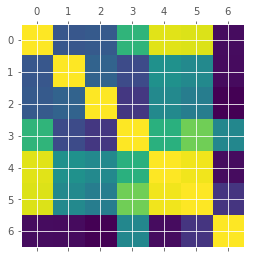

In [10]:
plt.matshow(df_salaries.corr())

In [11]:
# It seems the BasePay, Benefits, TotalPay and TotalPayBenefits are some level related.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A9A51D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C131198>]], dtype=object)

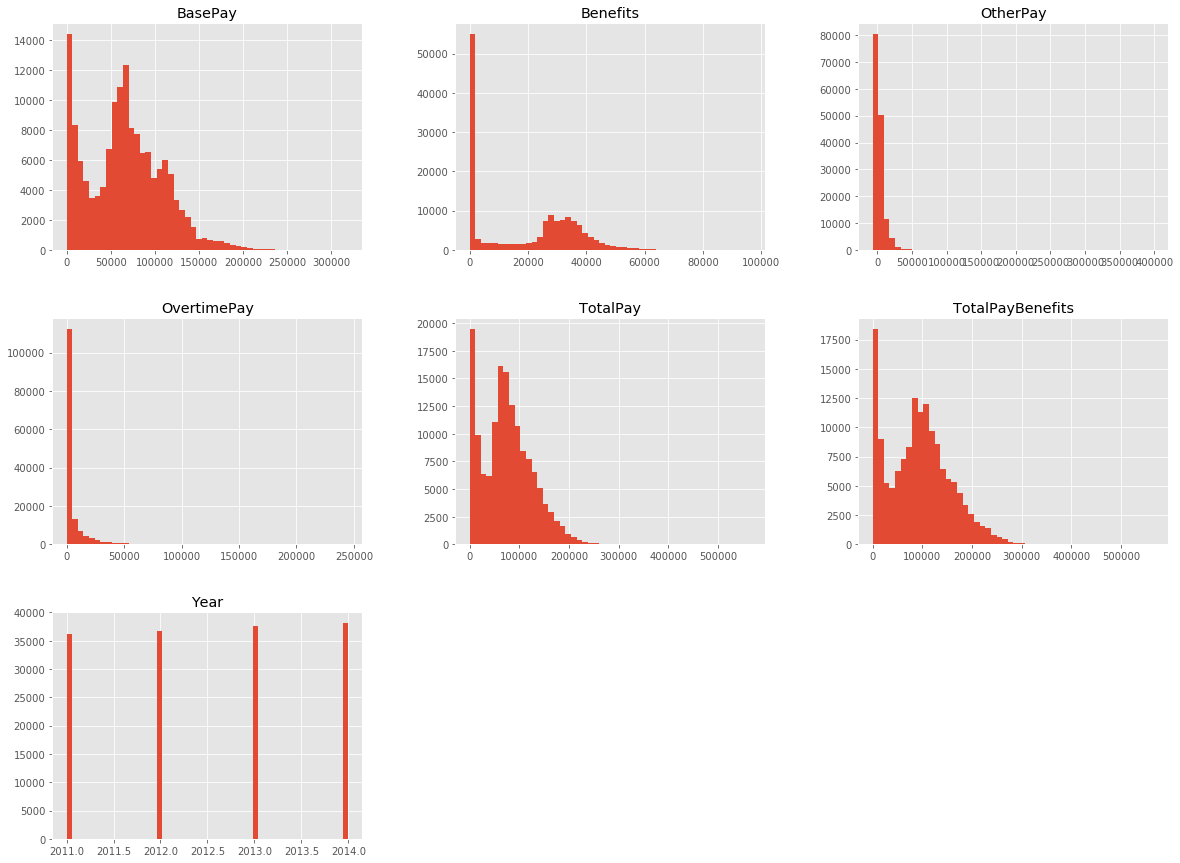

In [12]:
df_salaries.hist(bins=50, figsize=(20,15))

In [13]:
# It seems there were a few people earning a lot.

In [14]:
dfd_salaries = df_salaries.drop(['EmployeeName','JobTitle'],1)
dfd_salaries.head(5)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco,NaN
1,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,NaN
2,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco,NaN
3,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco,NaN
4,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco,NaN


In [15]:
dfd_salaries.sort_values('BasePay',axis=0, ascending=False).head(5)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
72925,319275.01,0.00,20007.06,86533.21,339282.07,425815.28,2013,San Francisco,NaN
110532,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT
72929,315572.01,0.00,0.00,82849.66,315572.01,398421.67,2013,San Francisco,NaN
72926,313686.01,0.00,23236.00,85431.39,336922.01,422353.40,2013,San Francisco,NaN
72931,313312.52,0.00,0.00,82319.51,313312.52,395632.03,2013,San Francisco,NaN


In [16]:
dfd_salaries.sort_values('OvertimePay',axis=0, ascending=False).head(5)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
1,155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,San Francisco,NaN
36159,128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco,NaN
72964,95123.00,196689.18,16622.66,36125.49,308434.84,344560.33,2013,San Francisco,NaN
36163,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,San Francisco,NaN
110574,94191.04,173547.73,19740.81,38238.57,287479.58,325718.15,2014,San Francisco,FT


In [17]:
dfd_salaries.sort_values('OtherPay',axis=0, ascending=False).head(5)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,167411.18,0.0,400184.25,0.00,567595.43,567595.43,2011,San Francisco,NaN
110531,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,PT
36167,104404.00,0.0,245999.41,24287.23,350403.41,374690.64,2012,San Francisco,NaN
36888,15158.50,0.0,206752.00,14074.28,221910.50,235984.78,2012,San Francisco,NaN
36195,104404.00,0.0,204290.09,24688.54,308694.09,333382.63,2012,San Francisco,NaN


In [18]:
dfd_salaries.sort_values('Benefits',axis=0, ascending=False).head(5)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
110533,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco,PT
110534,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,San Francisco,FT
110535,302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,San Francisco,FT
110537,311298.55,0.00,0.00,89772.32,311298.55,401070.87,2014,San Francisco,FT
110532,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT


In [19]:
dfd_salaries.sort_values('TotalPay',axis=0, ascending=False).head(5)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,San Francisco,NaN
1,155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,San Francisco,NaN
110531,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,PT
110532,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT
36159,128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco,NaN


In [20]:
dfd_salaries.sort_values('TotalPayBenefits',axis=0, ascending=False).head(5)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,San Francisco,NaN
1,155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,San Francisco,NaN
110531,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,PT
110532,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT
110533,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco,PT


In [21]:
# Does the BasePay has positive relationship with Benefits?

In [22]:
# The average paid(TotalPayBenefits) of all employees per year 
df_salaries.groupby('Year').mean()['TotalPayBenefits']

Year
2011     71744.103871
2012    100553.229232
2013    101440.519714
2014    100250.918884
Name: TotalPayBenefits, dtype: float64

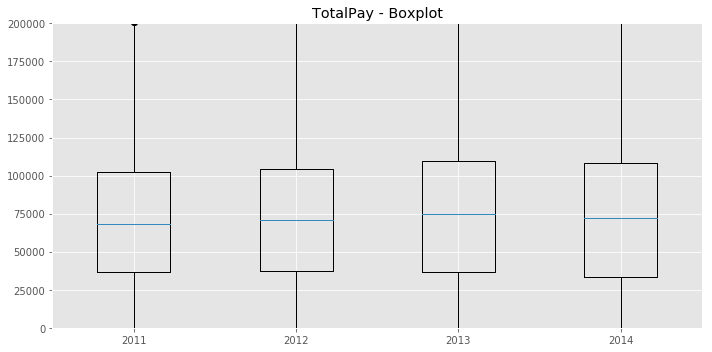

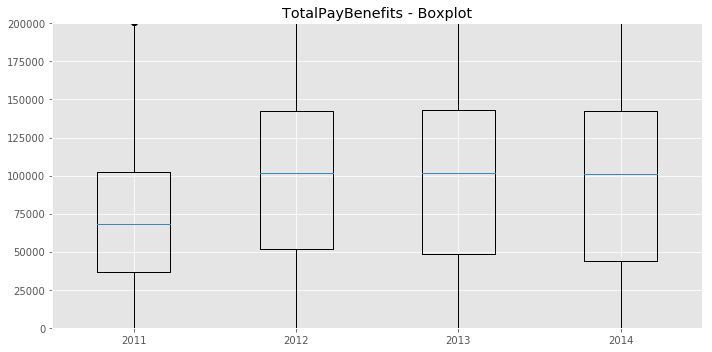

In [23]:
# BoxPlot Data
y2011 = df_salaries.loc[df_salaries['Year'] == 2011] 
y2012 = df_salaries.loc[df_salaries['Year'] == 2012] 
y2013 = df_salaries.loc[df_salaries['Year'] == 2013] 
y2014 = df_salaries.loc[df_salaries['Year'] == 2014]

plt.figure(figsize=(10,5))
plt.boxplot([y2011.TotalPay, y2012.TotalPay, y2013.TotalPay, y2014.TotalPay])
plt.ylim(0,200000) #limit of y
plt.title('TotalPay - Boxplot')
plt.xticks([1,2,3,4],['2011','2012','2013','2014'])
plt.tight_layout()

plt.figure(figsize=(10,5))
plt.boxplot([y2011.TotalPayBenefits, y2012.TotalPayBenefits, y2013.TotalPayBenefits, y2014.TotalPayBenefits])
plt.ylim(0,200000) #limit of y
plt.title('TotalPayBenefits - Boxplot')
plt.xticks([1,2,3,4],['2011','2012','2013','2014'])
plt.tight_layout()

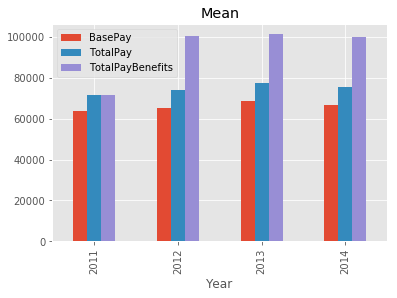

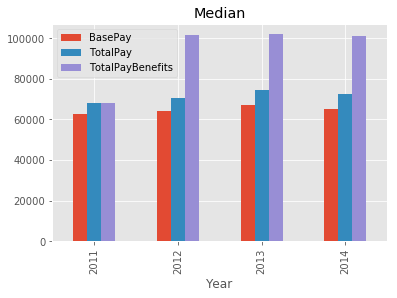

In [24]:
plotTableMean = df_salaries[["Year", "BasePay", "TotalPay", "TotalPayBenefits"]].groupby("Year").mean()
plotTableMean.plot(kind="bar", title = "Mean")
plotTableMedian = df_salaries[["Year", "BasePay", "TotalPay", "TotalPayBenefits"]].groupby("Year").median()
plotTableMedian.plot(kind="bar", title = "Median")

In [25]:
# After 2011, the Benefits increase into a new level.

In [26]:
# How many job titles
df_salaries['JobTitle'].nunique()

1637

In [27]:
# How many people in each job title
df_salaries.JobTitle.value_counts()

transit operator                                  9424
special nurse                                     5791
registered nurse                                  4955
custodian                                         3214
firefighter                                       3153
recreation leader                                 2663
deputy sheriff                                    2618
public svc aide-public works                      2518
police officer 3                                  2421
patient care assistant                            1945
                                                  ... 
assistant director, juvenile hall                    1
public safety comm tech                              1
secretary,juvenile probation commission              1
chief of department, (fire department)               1
asst dir clinical svcs 2                             1
electric motor repair supervisor i                   1
automotive body and fender worker supervisor i       1
is trainer

In [28]:
import seaborn as sns

def find_job_title(row):
    
    police_title = ['police', 'sherif', 'probation', 'sergeant', 'officer', 'lieutenant']
    fire_title = ['fire']
    transit_title = ['mta', 'transit']
    medical_title = ['anesth', 'medical', 'nurs', 'health', 'physician', 'orthopedic', 'pharm', 'care']
    court_title = ['court', 'legal']
    automotive_title = ['automotive', 'mechanic', 'truck']
    engineer_title = ['engineer', 'engr', 'eng', 'program']
    general_laborer_title = ['general laborer', 'painter', 'inspector', 'carpenter', 
                             'electrician', 'plumber', 'maintenance']
    aide_title = ['aide', 'assistant', 'secretary', 'attendant']
    
    for police in police_title:
        if police in row.lower():
            return 'police'    
    for fire in fire_title:
        if fire in row.lower():
            return 'fire'
    for aide in aide_title:
        if aide in row.lower():
            return 'assistant'
    for transit in transit_title:
        if transit in row.lower():
            return 'transit'
    for medical in medical_title:
        if medical in row.lower():
            return 'medical'
    if 'airport' in row.lower():
        return 'airport'
    if 'worker' in row.lower():
        return 'social worker'
    if 'architect' in row.lower():
        return 'architect'
    for court in court_title:
        if court in row.lower():
            return 'court'
    if 'major' in row.lower():
        return 'mayor'
    if 'librar' in row.lower():
        return 'library'
    if 'guard' in row.lower():
        return 'guard'
    if 'public' in row.lower():
        return 'public works'
    if 'attorney' in row.lower():
        return 'attorney'
    if 'custodian' in row.lower():
        return 'custodian'
    if 'account' in row.lower():
        return 'account'
    if 'garden' in row.lower():
        return 'gardener'
    if 'recreation' in row.lower():
        return 'recreation leader'
    for automotive in automotive_title:
        if automotive in row.lower():
            return 'automotive'
    for engineer in engineer_title:
        if engineer in row.lower():
            return 'engineer'
    for general_laborer in general_laborer_title:
        if general_laborer in row.lower():
            return 'general laborer'
    if 'food serv' in row.lower():
        return 'food service'
    if 'clerk' in row.lower():
        return 'clerk'
    if 'porter' in row.lower():
        return 'porter' 
    if 'analy' in row.lower():
        return 'analyst'
    if 'manager' in row.lower():
        return 'manager'
    else:
        return 'other'
    
df_salaries['CombJobTitle'] = df_salaries['JobTitle'].map(find_job_title)

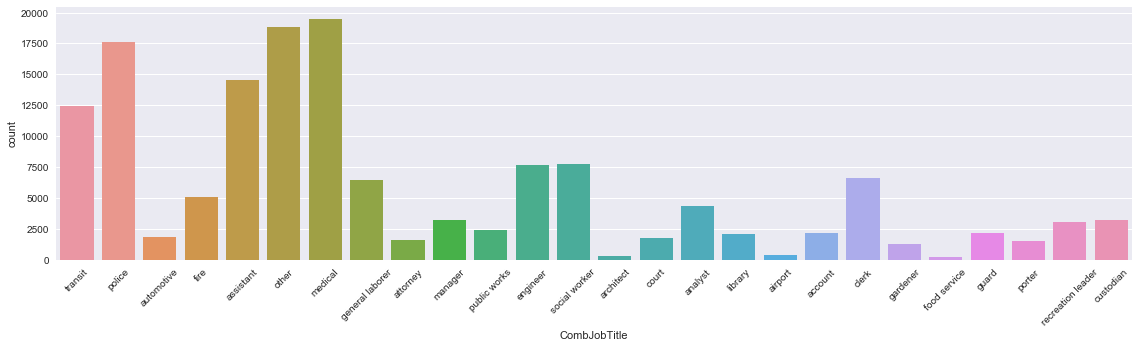

In [29]:
#Plot Counts of Job Title, Expand on this to add more subsets if desired as Other Title is still pretty high
plt.figure(figsize=(16,5))
sns.countplot('CombJobTitle', data = df_salaries)
plt.xticks(rotation = 45)
plt.tight_layout()

In [30]:
# How many people in each CombTobTitle, shown top 20
# df_salaries.CombJobTitle.value_counts().head(20)

medical              19496
other                18847
police               17622
assistant            14540
transit              12469
social worker         7784
engineer              7667
clerk                 6627
general laborer       6466
fire                  5129
analyst               4336
manager               3258
custodian             3214
recreation leader     3077
public works          2460
account               2207
guard                 2193
library               2127
automotive            1878
court                 1762
Name: CombJobTitle, dtype: int64

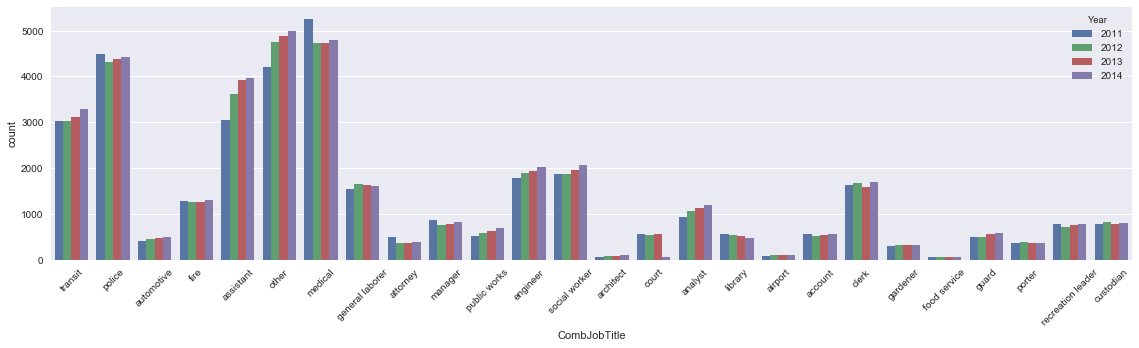

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot('CombJobTitle', data = df_salaries, hue = 'Year')
plt.xticks(rotation = 45)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot('TotalPayBenefits', data = df_salaries, hue = 'Year')
plt.xticks(rotation = 45)
plt.tight_layout()

In [ ]:
# df_CombJobTitle_2011 = df_salaries.CombJobTitle.loc[df_salaries['Year'] == 2011].value_counts().head(50)
# df_CombJobTitle_2011 =pd.DataFrame(df_CombJobTitle_2011)
# df_CombJobTitle_2011.columns =['2011']
# df_CombJobTitle_2012 = df_salaries.CombJobTitle.loc[df_salaries['Year'] == 2012].value_counts().head(50)
# df_CombJobTitle_2012 =pd.DataFrame(df_CombJobTitle_2012)
# df_CombJobTitle_2012.columns =['2012']
# df_CombJobTitle_2013 = df_salaries.CombJobTitle.loc[df_salaries['Year'] == 2013].value_counts().head(50)
# df_CombJobTitle_2013 =pd.DataFrame(df_CombJobTitle_2013)
# df_CombJobTitle_2013.columns =['2013']
# df_CombJobTitle_2014 = df_salaries.CombJobTitle.loc[df_salaries['Year'] == 2014].value_counts().head(50)
# df_CombJobTitle_2014 =pd.DataFrame(df_CombJobTitle_2014)
# df_CombJobTitle_2014.columns =['2014']

In [ ]:
# I am trying to make a table include each of the CombJobTitle, Sal_2011, Sal_2012, Sal_2013, Sal_2014. Then, graph it into lines

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot('CombJobTitle', data = df_salaries, hue = 'Status')
plt.xticks(rotation = 45)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot('Status', data = df_salaries, hue = 'Year')
plt.xticks(rotation = 45)
plt.tight_layout()

In [ ]:
df_salaries.Status.count()

In [ ]:
df_salaries.Status.isnull().sum()

## Project Design Writeup

### Requirements:

Well-articulated problem statement with "specific aim" and hypothesis, based on your lightning talk.
An outline of any potential methods and models.
Detailed explanation of the available data. (i.e., build a data dictionary or link to pre-built data dictionaries)
Describe any outstanding questions, assumptions, risks, and caveats.
Demonstrate domain knowledge, including specific features or relevant benchmarks from similar projects.
Define your goals and criteria, in order to explain what success looks like.

Below is a guide to help you complete the project design writeup. The questions for each section are merely there to suggest what the baseline should cover; be sure to use detail as it will make the project much easier to approach as the class moves on.

### Project Problem and Hypothesis

1. What's the project about? What problem are you solving?

2. Where does this seem to reside as a machine learning problem? Are you predicting some continuous number, or predicting a binary value?

3. What kind of impact do you think it could have?

4. What do you think will have the most impact in predicting the value you are interested in solving for?

1. The project is about how salaries grow during years.

2. I am trying to predict 1. the Salaries rise for the future years, and 2. the population increase for each of the Job title. 

3. I think the year is positive correlate with the Salaries and the population of each of the Job Title. 

4. I am trying to find out the top 20 job that increases the salaries the most and how much are increases for each job.

### Datasets

Description of data set available, at the field level.



The dataset is from import kaggle.com

https://www.kaggle.com/kaggle/sf-salaries

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

In [ ]:
df_salaries.columns

In [ ]:
df_salaries.head()

In [ ]:
df_salaries.describe()

### Domain knowledge

1. What experience do you already have around this area?

2. Does it relate or help inform the project in any way?

3. What other research efforts exist?

4. Use a quick Google search to see what approaches others have made, or talk with your colleagues if it is work related about previous attempts at similar problems.

5. This could even just be something like "the marketing team put together a forecast in excel that doesn't do well."

6. Include a benchmark, how other models have performed, even if you are unsure what the metric means.

1. I am learning a lot on the data exploration. I am learning the scripting from other study and rewrite the script into my study.

2. I found there are a lot of study on the same dataset. Some of them are related to what I am trying to study in this project.

3.   

4. Google search is helpful. It's easy to find the scripting that I am trying to use. Also, there are many good studies are shared by other people on Kaggle.com.

### Project Concerns

What questions do you have about your project? What are you not sure you quite yet understand? (The more honest you are about this, the easier your instructors can help)

What are the assumptions and caveats to the problem?

    What data do you not have access to but wish you had?

    What is already implied about the observations in your data set? For example, if your primary data set is twitter data, it may not be representative of the whole sample. (say, predicting who would win an election)

What are the risks to the project?

    What's the cost of your model being wrong? (What's the benefit of your model being right?)

    Is any of the data incorrect? Could it be incorrect?

### Outcomes

1. What do you expect the output to look like?

2. What does your target audience expect the output to look like?

3. What gain do you expect from your most important feature on its own?

4. How complicated does your model have to be?

5. How successful does your project have to be in order to be considered a "success"?

6. What will you do if the project is a bust (this happens! but it shouldn't here)?

In [ ]:
#Plot Counts of Job Title, Expand on this to add more subsets if desired as Other Title is still pretty high
plt.figure(figsize=(16,5))
sns.countplot('CombJobTitle', data = df_salaries)
plt.xticks(rotation = 45)
plt.tight_layout()